In [34]:
import anndata as ad
import pandas as pd
import scanpy as sc
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [31]:
sc.settings.figdir = "/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/results/"
gray_green = LinearSegmentedColormap.from_list(
    "gray_green", ["#D3D3D3", "#02500e", "#001203"]
)

In [3]:
adata_transformed = ad.read_h5ad("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_transformed.h5ad")

In [20]:
#importing subset from loupe
barcodes = pd.read_csv("/blue/square.t/peter.huynh/outs/scvelo_output/epi_interest.csv")["Barcode"].tolist()
sample_number_to_prefix_and_sample = {
    "1": ("plus4_v5e_062522_forced6k_possorted_genome_bam_CRXMJ", "p4"),
    "2": ("plus345_1_v5e_062522_forced6k_possorted_genome_bam_RL5DI", "p5_1"),
    "3": ("plus345_2_v5e_062522_forced6k_possorted_genome_bam_6EON9", "p5_2"),
    "4": ("minus4_v5e_062522_forced6k_possorted_genome_bam_GWFTD", "m4"),
    "5": ("minus345_2_v5e_062522_forced6k_possorted_genome_CEA3D", "m5")
}

def convert_barcode(bc):
    barcode_part, sample_number = bc.split("-")
    prefix, sample = sample_number_to_prefix_and_sample[sample_number]
    return f"{prefix}:{barcode_part}x"

barcodes_full = pd.Series(barcodes).apply(convert_barcode).tolist()
adata_subset = adata_transformed[adata_transformed.obs_names.isin(barcodes_full)].copy()

In [22]:
#save point
adata_subset_test=adata_subset.copy()

In [ ]:
#testing out different UMAPS
n_pcs_list = [15,25,30,40]
n_neighbors_list = [15,20,25,30]
adata_subset_test=adata_subset.copy()
sc.tl.pca(adata_subset_test, n_comps=50)

n_rows = len(n_pcs_list)
n_cols = len(n_neighbors_list)

fig_width = n_cols * 6
fig_height = n_rows * 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), sharex=True, sharey=True)

point_size = max(10, 60 - 5 * max(n_rows, n_cols))

for row, n_pcs in enumerate(n_pcs_list):
    for col, n_neighbors in enumerate(n_neighbors_list):
        ax = axes[row, col]
        adata_temp = adata_subset_test.copy()
        sc.pp.neighbors(adata_temp, n_neighbors=n_neighbors, n_pcs=n_pcs)
        sc.tl.umap(adata_temp)
        sc.tl.leiden(adata_temp)
        
        sc.pl.umap(
            adata_temp,
            color="leiden",
            title=f"pcs={n_pcs}, nn={n_neighbors}",
            cmap="viridis",
            ax=ax,
            show=False,        )
        
for ax in axes.flat:
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()

In [ ]:
#testing out different spreads
min_dist_list = [0.1, 0.3, 0.5]
spread_list = [0.8, 1.0, 1.2]
adata_subset_test=adata_subset.copy()
sc.tl.pca(adata_subset_test, n_comps=50)
n_rows = len(min_dist_list)
n_cols = len(spread_list)

fig_width = n_cols * 6
fig_height = n_rows * 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height), sharex=True, sharey=True)

point_size = max(10, 60 - 5 * max(n_rows, n_cols))

for row, min_dist in enumerate(min_dist_list):
    for col, spread in enumerate(spread_list):
        ax = axes[row, col]
        adata_temp = adata_subset_test.copy()
        

        sc.tl.pca(adata_temp, n_comps=50)        
        sc.pp.neighbors(adata_temp, n_neighbors=15, n_pcs=15)
        sc.tl.umap(adata_temp, min_dist=min_dist, spread=spread)
        sc.tl.leiden(adata_temp)
        
        sc.pl.umap(
            adata_temp,
            color="leiden",
            title=f"min_dist={min_dist}, spread={spread}",
            cmap="viridis",
            ax=ax,
            show=False,
            size=point_size
        )

for ax in axes.flat:
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()

/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/blue/square.t/miniconda3/envs/scvelo_033_scrublet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


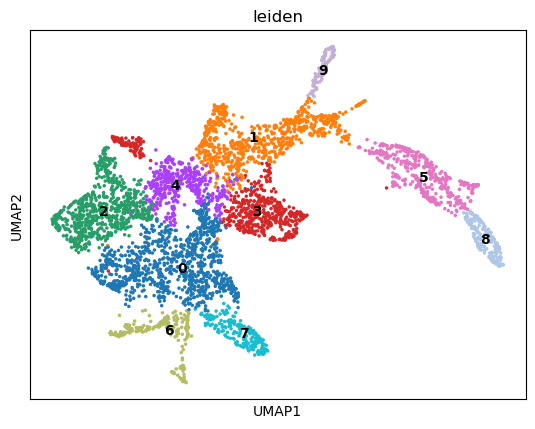

In [27]:
#final subset UMAP
adata_subset_test=adata_subset.copy()
sc.tl.pca(adata_subset_test, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata_subset_test, n_pcs=15, n_neighbors=15)  
sc.tl.umap(adata_subset_test,min_dist=0.3, spread=1.2)
sc.tl.leiden(adata_subset_test, resolution=0.3)
sc.pl.umap(adata_subset_test, color="leiden", cmap="viridis",legend_loc="on data",
         #save=f"_subset_combined_umap.pdf 
          )

In [37]:
adata_subset_test.write("/blue/square.t/peter.huynh/jupyter/combined_samples_scvelo/data/processed/adata_subset.h5ad")

In [ ]:
#testing gene on different samples
gene="calb2a"
for sample in adata_subset_test.obs["sample"].unique():
    sc.pl.umap(
        adata_subset_test[adata_subset_test.obs["sample"] == sample],
        color=gene,
        title=f"{sample}-{gene}",
        show=True,
        cmap=gray_green,
       #save=f"_subset_gene_umap_{sample}-{gene}.pdf 
    )

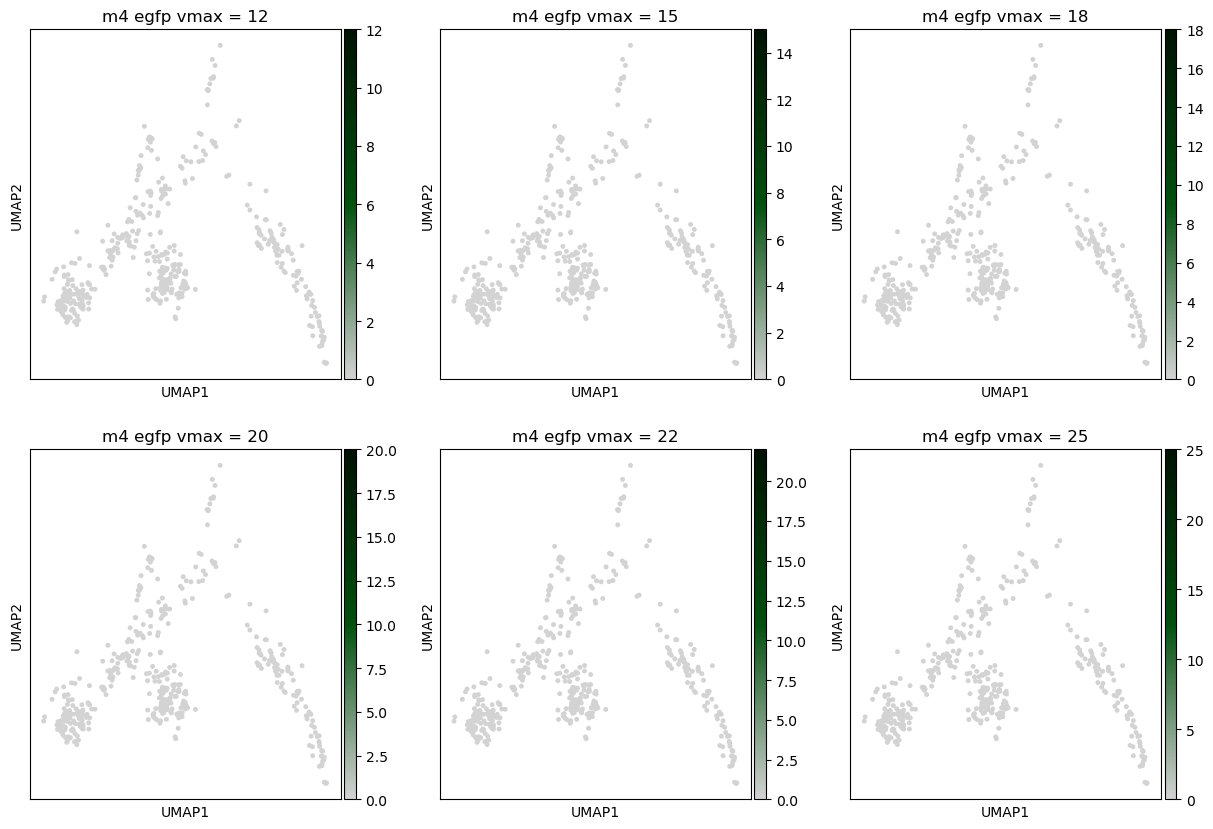

In [35]:
#testing different vmax on same sample
sample='m4'
adata_sample = adata_subset_test[adata_subset_test.obs["sample"] == f"{sample}"].copy()

vmax_values = [12,15,18,20,22,25]
#vmax_values = [2,5,8,10,12,6]

ncols = 3
nrows = (len(vmax_values) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

axes = axes.flatten()

for i, vmax in enumerate(vmax_values):
    ax = axes[i]
    sc.pl.umap(
        adata_sample,
        color="egfp",
        vmin=0,
        vmax=vmax,
        size=50,
        title=f"{sample} egfp vmax = {vmax}",
        cmap=gray_green,
        show=False,
        ax=ax  
    )

In [ ]:
sample='m4'
gene='egfp'
adata_sample = adata_subset_test[adata_subset_test.obs["sample"] == f"{sample}"].copy()
sc.pl.umap(
    adata_sample,
    color=gene,
    vmin=0,
    vmax=18,
    size=50,
    title=f'{sample}_{gene}',
    cmap=gray_softorange_orangered,
    #save=f"_subset_umap_{sample}_{gene}.pdf"
)